# Generalized Linear Model

## Introduction

Welcome back gamers. A generalized linear model predicts some dependent variable y using indepedent variable(s) x. It can be illustrated by a least squares regression line with the following equation:

![title](y1.PNG)

Where beta 0 and beta 1 are least squares estimators. Beta 0 is the intercept and beta 1 is the slope. 

There are simple linear regression models (one x variable is used to predict y) and multiple linear regression (more than one x variable is used to predict y). I will focus on a simple linear regression model. 

Beta 1 and Beta 0 are found by calculating the distance from each data point to the mean, and then squaring or summing those differences. We do this for the both the independent variables (x) and dependent variable (y). Unfortunately, it looks like this:

![title](y2.PNG)

Thankfully, Python's scikitlearn package can do all of this for us. But I'm a math major so I cannot just do that. I am going to play God and calculate Beta 1 and Beta 0 myself, and then compare my values to what the scikitlearn model uses. 


## Obtaining a data set

Before I obtain any data I will import pandas and numpy.

In [3]:
import pandas as pd
import numpy as np

I am going to use team_batting module from the pybaseball package. It takes every team's batting data from any season or range of seasons. The data comes from Fangraphs and Statcast I think, but not from the statcast module directly.  

In [4]:
from pybaseball import team_batting

I will save all batting data from 1980 to 2013 in a dataframe called data1

In [5]:
data1=team_batting(1990, 2013, ind=1)
#the ind=1 means that each season's data will be separated, not aggregated

data1.head(5)

,Season,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR
1,2001.0,Mariners,2043.0,6474.0,169.0,927.0,881.0,174.0,0.095,0.153,...,0.320,0.288,0.360,0.445,0.347,116.0,16.2,143.0,84.6,44.4
2,1998.0,Braves,1971.0,6217.0,215.0,826.0,794.0,98.0,0.088,0.171,...,0.300,0.272,0.342,0.453,0.346,108.0,0.8,61.7,124.6,37.6
3,1996.0,Mariners,1736.0,6518.0,245.0,993.0,954.0,90.0,0.103,0.161,...,0.312,0.287,0.366,0.484,0.367,112.0,-1.2,109.5,33.1,37.1
4,2011.0,Yankees,2301.0,6306.0,222.0,867.0,836.0,147.0,0.099,0.180,...,0.292,0.263,0.343,0.444,0.345,113.0,6.6,101.6,38.5,37.0
5,2013.0,Red Sox,2264.0,6382.0,178.0,853.0,819.0,123.0,0.091,0.205,...,0.329,0.277,0.349,0.446,0.347,114.0,13.3,116.7,14.9,36.6


## Picking Variables of Interest

Now we pick what two variables might have a linear relationship. Maybe the amount of home runs increase each season?

In [6]:
import seaborn as sns
fig1=sns.scatterplot(x="Season",y="HR",data=data1)
print(fig1)

AxesSubplot(0.125,0.11;0.775x0.77)


Absolutely not! <strike>I could have totaled the homeruns from each season but it's too late now.</strike>  So then I looked into wOBA and WAR.

Here is what FanGraphs defines wOBA as:

![title](f1.PNG)

And here is the definition for WAR:

![title](f2.PNG)

Of course, the value of a batter's hits will affect the batter's overall value to the team. Here is what the relationship looks like:

AxesSubplot(0.125,0.125;0.775x0.755)


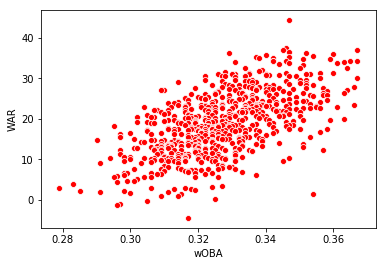

In [7]:
fig2=sns.scatterplot(x="wOBA",y="WAR",color='red',data=data1)
print(fig2)

## Calculating beta values...manually

Now that we have our variables, let's go back to our beta equations

![title](y2.PNG)

We need the means of both wOBA and WAR, the distances from each wOBA and WAR value to their respective means, and the squared wOBA distances...for now!

I will find the means first.

In [8]:
mean_woba=np.mean(data1["wOBA"])
mean_war=np.mean(data1["WAR"])
print('wOBA mean=',mean_woba)
print('WAR mean=',mean_war)

wOBA mean= 0.326949856733524
WAR mean= 18.692120343839548


To get everything else, I will create a new dataframe called data 2.

In [9]:
data2=pd.DataFrame(data=data1,columns=["wOBA","WAR"])
data2["x_diff"]=data2["wOBA"]-mean_woba
data2["x_diffSQ"]=data2["x_diff"]**2
data2["y_diff"]=data2["WAR"]-mean_war

data2.head(5)

,wOBA,WAR,x_diff,x_diffSQ,y_diff
1,0.347,44.4,0.02005,0.000402,25.70788
2,0.346,37.6,0.01905,0.000363,18.90788
3,0.367,37.1,0.04005,0.001604,18.40788
4,0.345,37.0,0.01805,0.000326,18.30788
5,0.347,36.6,0.02005,0.000402,17.90788


Now we will plug all of this into the beta equations. Remember that beta1 is the slope, it tells us how much our predicted WAR value will change per one unit increase in wOBA. Beta0 is the intercept. 

In [10]:
beta1=(np.sum(data2["x_diff"]*data2["y_diff"]))/(np.sum(data2["x_diffSQ"]))
beta0=mean_war-(beta1*mean_woba)
print('beta1 =',beta1)
print('beta0 =',beta0)

beta1 = 306.15074742254336
beta0 = -81.4038226648223


We will refer to these values later. Now we will use a linear modeling function from the scikit-learn python package that does all of this for us. 

## Scikit Learn Model

In [11]:
from sklearn import linear_model

#create a new linear model
lm=linear_model.LinearRegression()

#Assigning my independent and dependent variables to 'x' and 'y' so they are easier to keep track of
X=data2["wOBA"]
X2=X.values.reshape(-1,1)
#there was an issue with the x values and I don't know why but I fixed it
y=data2["WAR"]

#we want our model to use x2, our woba values, to predict y, WAR, so we fit the data to the model
my_model=lm.fit(X2,y)

#now we want the model's predictions for the first five WAR values in our dataframe
predictions=lm.predict(X2)
print(predictions[0:5])

[24.83048669 24.52433594 30.95350164 24.2181852  24.83048669]


In [12]:
#To see how much of the variance in our data set is encompassed by our model we can look at the r squared coefficient
rsq=lm.score(X2,y)
print(rsq)

0.36049833259526676


Yikes! Let's check the beta values.

In [13]:
print("The model's beta 1 value is ",lm.coef_," and ours was ",beta1)
print("The model's beta 0 value is",lm.intercept_,"and ours was",beta0)

The model's beta 1 value is  [306.15074742]  and ours was  306.15074742254336
The model's beta 0 value is -81.40382266482246 and ours was -81.4038226648223


So we did something right. Now let's see the graph of our line against the data.

Text(0.5, 1.0, 'WAR Predicted by wOBA from 1990-2013')

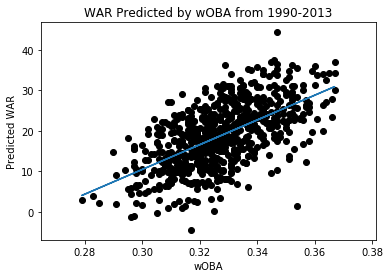

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X2,y,color='black')
fig5=plt.plot(X2,predictions)
plt.xlabel("wOBA")
plt.ylabel("Predicted WAR")
plt.title("WAR Predicted by wOBA from 1990-2013")

Cool! Now that we have a model, let's make predictions

## Using the model to make predictions

To make the model, I used data from 1980 to 2013. So, now we will make predictions about the 2014-2018 seasons and compare those predictions to the actual values. This calls for a new dataframe and variables. 

In [15]:
newdata=team_batting(2014,2018,ind=1)
xnew=newdata['wOBA']
x2new=xnew.values.reshape(-1,1)
ynew=newdata['WAR']

We will now use our model and predict our new y values (WAR values from 2014-2018).

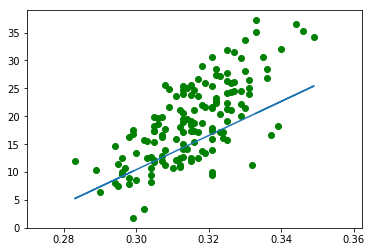

In [16]:
newpredictions=lm.predict(x2new)

#let's graph
plt.scatter(x2new,ynew,color='green')
fig6=plt.plot(x2new,newpredictions)

In [17]:
#Let's see how well the line fits the new data with the r squared coefficient
lm.score(x2new,ynew)

0.18312424134855465

## Home Run Example

Say we want to try to predict the total amount of home runs for each season. 

In [54]:
#Making two lists to hold our variables of interest: season and homeruns
szn=[] 
hrs=[]   

#Our original dataframe does not provide the total amount of home runs for each season so we have to sum them
for x in data1.Season:
    szn.append(x)
    hrs.append(data1.loc[data1['Season']==x,'HR'].sum())

#add the season and total homeruns to a new dataframe    
hr=pd.DataFrame(columns=["Season","HRS"])
hr.Season=szn  
hr.HRS=hrs 
hr.head(8)

,Season,HRS
0,2001.0,5458.0
1,1998.0,5064.0
2,1996.0,4962.0
3,2011.0,4552.0
4,2013.0,4661.0
5,1990.0,3317.0
6,2011.0,4552.0
7,1998.0,5064.0


Our dataframe has duplicates, so we will have to drop them

In [55]:
hr.reset_index(drop=True)
hr.drop_duplicates(inplace=True)
hr.sort_values(['Season','HRS']).head(5)


,Season,HRS
5,1990.0,3317.0
43,1991.0,3383.0
54,1992.0,3038.0
10,1993.0,4030.0
123,1994.0,3306.0


A plot of our data

Text(0.5, 1.0, 'Total homeruns from 1990 to 2013')

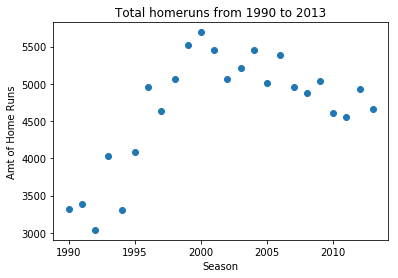

In [56]:
fig7=plt.scatter(hr.Season,hr.HRS)
plt.xlabel('Season')
plt.ylabel('Amt of Home Runs')
plt.title("Total homeruns from 1990 to 2013")

Let's build another linear model because I don't know what the other ones mean yet

In [57]:
lm2=linear_model.LinearRegression()

hrX=hr["Season"]
hrX2=hrX.values.reshape(-1,1)
hry=hr["HRS"]

hr_model=lm2.fit(hrX2,hry)
hrpredictions=lm.predict(hrX2)
#print a few predicted amounts of total homeruns
print(hrpredictions[0:5])

[612526.24176984 611607.78952758 610995.48803273 615587.74924407
 616200.05073892]


Let's check our beta0 and beta1 values

In [58]:
print('beta1=',lm2.coef_)
print('beta0=',lm2.intercept_)

beta1= [62.02130435]
beta0= -119458.26565217388


Now we will graph our model over the data

Text(0.5, 1.0, 'HRS Predicted from 1990-2013')

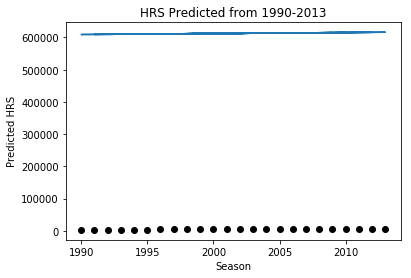

In [59]:
plt.scatter(hrX2,hry,color='black')
fig8=plt.plot(hrX2,hrpredictions)
plt.xlabel("Season")
plt.ylabel("Predicted HRS")
plt.title("HRS Predicted from 1990-2013")

oh